# Import Libraries

In [1]:
import os

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE



In [2]:
cd ..

c:\Users\Lenovo\Desktop\Tourist Attraction Recommendation System


c:\Users\Lenovo\Desktop\Tourist Attraction Recommendation System\venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
# # Loading all the cleaned data in different csv files
# # Specify the folder containing the CSV files
# folder_path = 'Dataset/Cleaned'

# # Initialize an empty list to store DataFrames
# dataframes = []

# # Iterate over each file in the folder
# for file_name in os.listdir(folder_path):
#     if file_name.endswith('.csv'):  # Check if the file is a CSV
#         file_path = os.path.join(folder_path, file_name)
#         df = pd.read_csv(file_path)  # Load CSV into a DataFrame
#         dataframes.append(df)  # Append the DataFrame to the list

# # Concatenate all DataFrames into one
# combined_df = pd.concat(dataframes, ignore_index=True)

# # Display the combined DataFrame
# print(combined_df)

combined_df = pd.read_csv("Third_Phase.csv")

In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32229 entries, 0 to 32228
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           32229 non-null  int64  
 1   Name         32229 non-null  object 
 2   Latitude     32229 non-null  float64
 3   Longitude    32229 non-null  float64
 4   Country      32229 non-null  object 
 5   City         32229 non-null  object 
 6   Category     32229 non-null  object 
 7   Description  32229 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.0+ MB


In [6]:
top10_countries = combined_df['Country'].value_counts().reset_index().head(10)
top10_countries

,Country,count
0,Indonesia,19474
1,India,7522
2,Malaysia,3246
3,Sri Lanka,727
4,Singapore,454
5,Nepal,443
6,Timor-Leste,132
7,China,56
8,Brunei,41
9,Japan,24


In [9]:
#Clean the dataset
combined_df.dropna(subset = 'Description',inplace=True)
combined_df.drop_duplicates(subset ='Name',inplace= True)
combined_df= combined_df.reset_index(drop=True)
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32023 entries, 0 to 32022
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           32023 non-null  int64  
 1   Name         32023 non-null  object 
 2   Latitude     32023 non-null  float64
 3   Longitude    32023 non-null  float64
 4   Country      32023 non-null  object 
 5   City         32023 non-null  object 
 6   Category     32023 non-null  object 
 7   Description  32023 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.0+ MB


In [16]:
# df= combined_df.groupby('country')['name'].nunique()
#find number of unique countries
combined_df['Country'].nunique()

37

In [17]:
#find the missing countries
asian_countries = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan",
    "Brunei", "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia",
    "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait",
    "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia",
    "Myanmar (Burma)", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine",
    "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea",
    "Sri Lanka", "Syria", "Tajikistan", "Thailand", "Timor-Leste", "Turkey",
    "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
]

df_set = set(combined_df['Country'])
for Country in asian_countries:
    if Country not in df_set:
        print(Country)

Bhutan
Iran
Kuwait
Laos
Maldives
Myanmar (Burma)
North Korea
South Korea
Syria
Turkey
Vietnam


In [10]:
df = combined_df[combined_df['Country'] == 'Nepal'].reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        436 non-null    int64  
 1   ID           436 non-null    int64  
 2   Name         436 non-null    object 
 3   Latitude     436 non-null    float64
 4   Longitude    436 non-null    float64
 5   Country      436 non-null    object 
 6   City         436 non-null    object 
 7   Category     436 non-null    object 
 8   Description  436 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 30.8+ KB


In [11]:
top10_countries = combined_df['Country'].value_counts().reset_index().head(10)
top10_countries

,Country,count
0,Indonesia,19449
1,India,7515
2,Malaysia,3118
3,Sri Lanka,715
4,Nepal,436
5,Singapore,433
6,Timor-Leste,126
7,China,56
8,Brunei,41
9,Japan,24


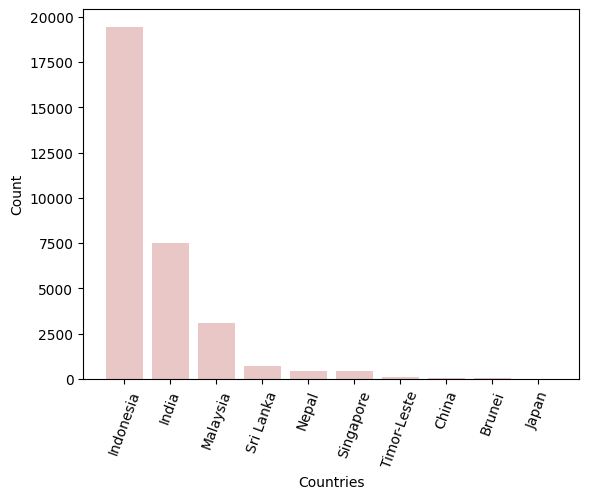

In [12]:
plt.bar(top10_countries['Country'], top10_countries['count'], color = '#E9C7C6')
plt.xlabel("Countries")
plt.xticks(rotation=70, horizontalalignment="center")
plt.ylabel("Count")
plt.show()

In [13]:
# Vectorize 'Description' column using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
description_vectors = tfidf.fit_transform(combined_df['Description']).toarray()


In [14]:

# One-hot encode 'Category'
encoder = OneHotEncoder()
category_encoded = encoder.fit_transform(combined_df[['Category']]).toarray()

In [18]:
# Combine Latitude, Longitude with encoded features and TF-IDF vectors
geo_features = combined_df[['Latitude', 'Longitude']].values
geo_weight = 0.5
desc_weight = 1.5
category_weight = 1.0

weighted_features = np.hstack((
    geo_features * geo_weight,
    category_encoded * category_weight,
    description_vectors * desc_weight
))


In [19]:
# Compute similarity between places
similarity_matrix = cosine_similarity(weighted_features)

In [20]:
# Get recommendations for a specific place (e.g., index 0)
place_index = 123
similar_places = np.argsort(-similarity_matrix[place_index])[1:6]  # Top 5 excluding itself
similar_places


array([120,  80, 167, 139, 110])

In [21]:
print(combined_df.iloc[similar_places])


      ID                                 Name   Latitude  Longitude Country  \
120  123  Dutch & Armenian Tombs & Cemeteries  21.209395  72.827151   India   
80    83                  Ananteshwara temple  22.224585  71.168065   India   
167  171                      Navlakha temple  22.457736  71.413465   India   
139  142                 Jethabhai's Stepwell  22.974469  72.603359   India   
110  113                           Darbargarh  23.011688  71.178659   India   

                City  Category  \
120            Surat  Monument   
80   Bhadia Anandpur  Monument   
167          Gujarat  Monument   
139          Gujarat  Monument   
110           Halvad  Monument   

                                           Description  
120          Monument of national imporance. N-GJ-180.  
80         Monuments of National Importance. N-GJ-189.  
167         Monument of national importance. N-GJ-186.  
139  Monument of National Importance. ASI Monument ...  
110         Monument of national im

In [23]:
indices = pd.Series(combined_df.index, index=combined_df['Name']).drop_duplicates()


In [24]:
def content_recommender(title, cosine_sim=similarity_matrix, df=df,
indices=indices):
    # Obtain the index of the attraction that matches the title
    idx = indices[title]
    # Get the pairwsie similarity scores of all attraction with that attraction
    # And convert it into a list of tuples as described above
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the attractions based on the cosine similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar attraction. Ignore the first movie.
    sim_scores = sim_scores[1:11]
    # Get the attraction indices
    attraction_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar attraction
    return combined_df.iloc[attraction_indices]

In [28]:
print(combined_df[combined_df["Name"]== "Attayam Chira"])


    ID           Name   Latitude  Longitude Country          City  \
86  89  Attayam Chira  10.004348  76.594083   India  Muvattupuzha   

              Category Description  
86  Tourist Attraction  Water Fall  


In [27]:
content_recommender("Attayam Chira")

,ID,Name,Latitude,Longitude,Country,City,Category,Description
188,192,Roaduvila Irappu para waterfalls,8.867840,76.814008,India,Oyoor,Tourist Attraction,A nice stream and waterfall
960,969,Cellular Jail,11.674446,92.747786,India,Port Blair,Landmark,"The Cellular Jail, also known as 'Kālā Pānī' (..."
228,232,உபகார மாதா ஆலயம்,8.417446,77.945701,India,Mudalur,Tourist Attraction,www.facebook.com/navamudalur/
229,233,சின்ன தும்கல் நீர் வீழ்ச்சி (thumkal water falls),12.171014,77.915037,India,Pennagaram,Tourist Attraction,Seasonal Waterfalls
1529,1544,Aqua Nomad,12.018494,93.007350,India,Krishna nagar village,Tourist Attraction,Not Available
4407,4527,Krishna nagar village,12.004087,92.976489,India,Krishna nagar village,Tourist Attraction,Not Available
1848,1866,Beach,12.134683,92.805584,India,Gandhighat Jetty,Tourist Attraction,Not Available
8137,8284,sea turtle spotting place-snorkeling,11.979005,92.957269,India,Krishna nagar village,Tourist Attraction,Not Available
8231,8378,BEECH DERA CHOWK,12.167210,92.785008,India,Gandhighat Jetty,Tourist Attraction,Not Available
8241,8388,My Home,12.176608,92.788755,India,Gandhighat Jetty,Tourist Attraction,Not Available


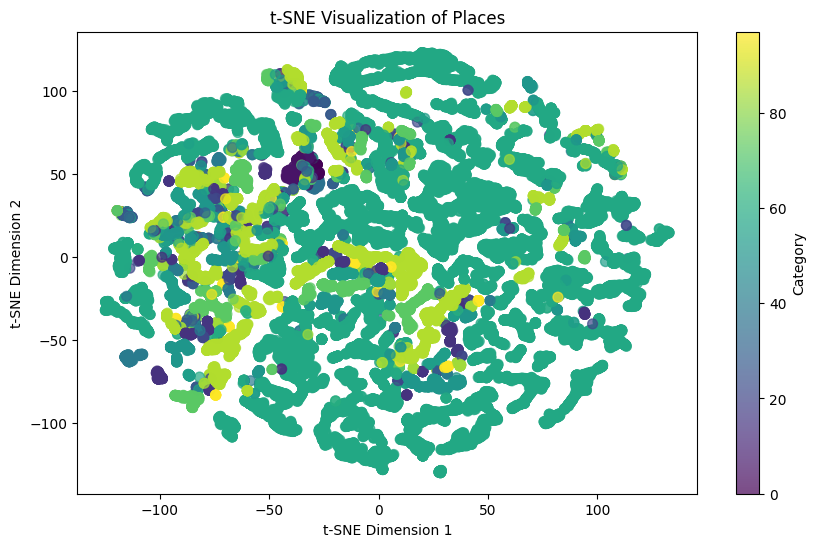

In [31]:

# Assuming 'features' contains your combined feature vectors
# Step 1: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_features = tsne.fit_transform(weighted_features)

# Step 2: Plot the reduced features
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1],
                      c=combined_df['Category'].astype('category').cat.codes, cmap='viridis', s=50, alpha=0.7)

# Add a legend (if categories are used)
plt.colorbar(scatter, label='Category')
plt.title('t-SNE Visualization of Places')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()